In [1]:
#################### Question 1(a) ####################
prev_values=[[0,0,0] for i in range(3)]
cur_values=[[0,0,0] for i in range(3)]
iters=101
for t in range(iters):
    for i in range(3):
        for j in range(3):
            if i==0 and j==0:
                cur_values[i][j]=10+0.9*prev_values[2][2]
            else:
                if j!=0:
                    a=prev_values[i][j-1]*0.9
                else:
                    a=-1+prev_values[i][j]*0.9
                if j!=2:
                    b=prev_values[i][j+1]*0.9
                else:
                    b=-1+prev_values[i][j]*0.9
                if i!=0:
                    c=prev_values[i-1][j]*0.9
                else:
                    c=-1+prev_values[i][j]*0.9
                if i!=2:
                    d=prev_values[i+1][j]*0.9
                else:
                    d=-1+prev_values[i][j]*0.9
                cur_values[i][j]=0.25*(a+b+c+d)
                # if t==1 and i==0 and j==0:
                #     print(a,b,c,d)
    prev_values=cur_values[:]
    if t==0 or t==1 or t==5 or t==20 or t==50 or t==100:
        for i in range(3):
            for j in range(3):
                cur_values[i][j]=round(cur_values[i][j],2)
        print("state-value functions at",t,"th iteration:")
        print(cur_values[0])
        print(cur_values[1])
        print(cur_values[2],'\n')
    cur_values=[[0,0,0] for i in range(3)]

state-value functions at 0 th iteration:
[10.0, -0.25, -0.5]
[-0.25, 0.0, -0.25]
[-0.5, -0.25, -0.5] 

state-value functions at 1 th iteration:
[9.55, 1.83, -0.84]
[1.83, -0.23, -0.53]
[-0.84, -0.53, -0.84] 

state-value functions at 5 th iteration:
[8.72, 2.33, -0.29]
[2.33, 0.73, -0.64]
[-0.29, -0.64, -1.45] 

state-value functions at 20 th iteration:
[8.82, 2.46, -0.11]
[2.46, 0.88, -0.48]
[-0.11, -0.48, -1.31] 

state-value functions at 50 th iteration:
[8.85, 2.49, -0.07]
[2.49, 0.92, -0.45]
[-0.07, -0.45, -1.27] 

state-value functions at 100 th iteration:
[8.85, 2.5, -0.07]
[2.5, 0.92, -0.44]
[-0.07, -0.44, -1.27] 



In [68]:
#################### Question 1(b)(d)  classes definition  ####################
from matplotlib import pyplot as plt
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time
def sampleWeighted(p):
    r = random.random()
    c = 0.0
    for i in range(len(p)):
      c += p[i]
      if c >= r:
          return i
    print("should not be here!")
def reshapeArr(arr):
    res=np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            res[i][j]+=arr[i*3+j]
    return res
def setConst(arr, c):
    for i in range(len(arr)):
        arr[i] = c
def randi(a,b):
    return math.floor(random.random()*(b-a)+a)
class GridWorld:
    def __init__(self):
        self.legalstate=[i for i in range(9)]
        self.reset()
    def reset(self):
        self.gh=3
        self.gw=3
        self.gs=self.gh*self.gw
    def reward(self,s,a,ns):
        # a=0:left a=1:up a=2:down a=3:right
        r=0
        if ns==s:
            r=-1
        if s==0 and ns==8:
            r=10
        return r
    def nextStateDistribution(self,s,a):
        x=self.stox(s)
        y=self.stoy(s)
        ns=s
        if a==0 and y>0:
                ns=s-1
        elif a==1 and x<2:
            ns=s+3
        elif a==2 and x>0:
            ns=s-3
        elif a==3 and y<2:
            ns=s+1
        if s==0:
            ns=8
        return ns
    def sampleNextState(self,s,a):
        ns=self.nextStateDistribution(s,a)
        r = self.reward(s,a,ns)
        out = {'ns':ns, 'r':r}
        return out
    # takes an integer `s` and returns a list of available actions, 
    # which should be integers from zero to `maxNumActions`
    def allowedActions(self,s):
        x = self.stox(s)
        y = self.stoy(s)
        availa = [0,1,2,3]
        # a=0:left a=1:up a=2:down a=3:right
        return availa
    def randomState(self):
        return math.floor(random.random()*self.gs)
    def startState(self):
        return 0
    # returns an integer of total number of states
    def getNumStates(self):
        return self.gs
    # returns an integer with max number of actions in any state
    def getMaxNumActions(self):
        return 4
    def stox(self,s):
        return math.floor(s/self.gh)
    def stoy(self,s):
        return s % self.gh
    def xytos(self,x,y):
        return x*self.gh + y

class VAgent:
    def __init__(self,env,opt=0.75):
        self.V=None
        self.P=None
        self.alpha=0.005
        self.env=env
        self.gamma=opt
        self.reset()
    def reset(self):
        self.ns=self.env.getNumStates()
        self.na = self.env.getMaxNumActions()
        self.V = np.zeros(self.ns)
        self.P = np.zeros(self.ns*self.na)
        # initialize uniform random policy
        for s in range(self.ns):
            poss = self.env.allowedActions(s)
            for i in range(len(poss)):
               self.P[poss[i]*self.ns+s] = 1.0 / len(poss)

    def evaluatePolicy(self):
        Vnew = np.zeros(self.ns)
        for s in range(self.ns):
            v=0.0
            poss=self.env.allowedActions(s)
            for i in range(len(poss)):
                a = poss[i]
                prob = self.P[a*self.ns+s]
                ns=self.env.nextStateDistribution(s,a)
                rs = self.env.reward(s,a,ns)
                v += prob * (rs + self.gamma * self.V[ns])
            Vnew[s] = v
        self.V = Vnew
        # print(self.V)
    def TDlearn(self):
        s=np.random.randint(9)
        for cnt in range(1000000):
            a=np.random.randint(4)
            ns=self.env.nextStateDistribution(s,a)
            rs = self.env.reward(s,a,ns)
            self.V[s]+=self.alpha*(rs+self.gamma*self.V[ns]-self.V[s])
            s=ns

    def updatePolicy(self):
        for s in range(self.ns):
            poss=self.env.allowedActions(s)
            # compute value of taking each allowed action
            vmax=nmax=0
            vs=[]
            for i in range(len(poss)):
                a=poss[i]
                ns=self.env.nextStateDistribution(s,a)
                rs = self.env.reward(s,a,ns)
                v = rs + self.gamma * self.V[ns]
                vs.append(v)
                if i==0 or v>vmax:
                    vmax=v
                    nmax=1
                elif v==vmax:
                    nmax+=1
            for i in range(len(poss)):
                a=poss[i]
                if vs[i] == vmax:
                    self.P[a*self.ns+s]=1.0/nmax
                else:
                    self.P[a*self.ns+s]=0.0

    def visual(self,vtype):
        # print(self.P)
        curP=[['' for i in range(3)] for j in range(3)]
        # handle Policy
        for y in range(3):
            for x in range(3):
                s = self.env.xytos(x,y)
                ssArr=[]
                for a in range(4):
                    prob = self.P[a*9+s]
                    ss = prob * 0.9
                    ssArr.append(ss)
                opt=max(ssArr)
                if opt!=0:
                    if ssArr[2]==opt:
                        curP[y][x]+='←'
                    if ssArr[0]==opt:
                        curP[y][x]+='↑'
                    if ssArr[1]==opt:
                        curP[y][x]+='↓'
                    if ssArr[3]==opt:
                        curP[y][x]+='→'
        
        # handle Value
        curV=reshapeArr(self.V)
        for i in range(3):
            for j in range(3):
                curV[i][j]=round(curV[i][j],2)
        
        combo=[[[] for i in range(3)] for j in range(3)]
        for i in range(3):
            for j in range(3):
                combo[i][j]=(curV[i][j],curP[i][j])
        if vtype=='combo':
            ytable=plt.table(cellText=combo, loc=(0, 0), cellLoc='center')
        else:
            ytable=plt.table(cellText=curV, loc=(0, 0), cellLoc='center')
        ytable.scale(1,4)
        plt.axis('off')
        plt.show()
class QAgent:
    # method: qlearn
    def __init__(self,env,gamma=0.9):
        self.gamma = gamma # future reward discount factor
        self.Q=None
        self.P=None
        self.env=env
        self.reset()

    def reset(self):
        self.ns = self.env.getNumStates()
        self.na = self.env.getMaxNumActions()
        self.Q = np.zeros(self.ns * self.na)
        self.P = np.zeros(self.ns * self.na)
        # initialize uniform random policy
        for s in range(self.ns):
            actions = self.env.allowedActions(s)
            for i in range(len(actions)):
                self.P[actions[i]*self.ns+s] = 1.0 / len(actions)
        # agent memory, needed for streaming updates
        # (s0,a0,r0,s1,a1,r1,...)
        self.r0 = None
        self.s0 = None
        self.s1 = None
        self.a0 = None
        self.a1 = None
    def act(self,s):
        actions = self.env.allowedActions(s)
        probs = []
        for i in range(len(actions)):
            probs.append(self.P[actions[i]*self.ns+s])
        a = actions[randi(0,len(actions))]
        self.s0 = self.s1
        self.a0 = self.a1
        self.s1 = s
        self.a1 = a
        return a
    def learn(self,r1):
        if self.r0!=None:
            s0=self.learnFromTuple(self.s0, self.a0, self.r0, self.s1, self.a1)
            self.updatePolicy(s0)
        self.r0 = r1
    def learnFromTuple(self,s0, a0, r0, s1, a1):
        sa = a0 * self.ns + s0
        # calculate the target for Q(s,a)
        # Q learning target is Q(s0,a0) = r0 + gamma * max_a Q[s1,a]
        actions = self.env.allowedActions(s1)
        qmax = 0
        for i in range(len(actions)):
            s1a = actions[i] * self.ns + s1
            s1a=int(s1a)
            qval = self.Q[s1a]
            if i == 0 or qval > qmax:
                qmax = qval
        target = r0 + self.gamma * qmax
        update = target - self.Q[sa]
        self.Q[sa] += update
        return s0
    def updatePolicy(self,s):
        actions = self.env.allowedActions(s)
        qmax=nmax=0
        qs = []
        for i in range(len(actions)):
            a = actions[i]
            qval = self.Q[a*self.ns+s]
            qs.append(qval)
            if i == 0 or qval > qmax:
                qmax = qval
                nmax = 1
            elif qval == qmax:
                nmax += 1

        # now update the policy smoothly towards the argmaxy actions
        psum = 0.0
        for i in range(len(actions)):
            a = actions[i]
            if qs[i] == qmax:
                target=1.0/nmax
            else:
                target=0.0
            ix = a*self.ns+s
                # slightly hacky :p
            self.P[ix] += target - self.P[ix]
            psum += self.P[ix]
        
        for i in range(len(actions)):
            a = actions[i]
            self.P[a*self.ns+s] /= psum

    def visual(self,vtype):
        # print(self.P)
        curP=[['' for i in range(3)] for j in range(3)]
        # handle Policy
        for y in range(3):
            for x in range(3):
                s = self.env.xytos(x,y)
                ssArr=[]
                for a in range(4):
                    prob = self.P[a*9+s]
                    ss = prob * 0.9
                    ssArr.append(ss)
                opt=max(ssArr)
                if opt!=0:
                    if ssArr[2]==opt:
                        curP[y][x]+='←'
                    if ssArr[0]==opt:
                        curP[y][x]+='↑'
                    if ssArr[1]==opt:
                        curP[y][x]+='↓'
                    if ssArr[3]==opt:
                        curP[y][x]+='→'
        
        # handle Q-Value
        curQ=np.zeros(9)
        for y in range(3):
            for x in range(3):
                s = self.env.xytos(x,y)
                actions = self.env.allowedActions(s)
                vv = -1
                for i in range(len(actions)):
                    qsa = self.Q[actions[i]*9+s]
                    if i==0 or qsa>vv:
                        vv=qsa
                curQ[s]=vv

        curQ=reshapeArr(curQ)
        for i in range(3):
            for j in range(3):
                curQ[i][j]=round(curQ[i][j],2)

        combo=[[[] for i in range(3)] for j in range(3)]
        for i in range(3):
            for j in range(3):
                combo[i][j]=(curQ[i][j],curP[i][j])

        if vtype=='combo':
            ytable=plt.table(cellText=combo, loc=(0, 0), cellLoc='center')
        else:
            ytable=plt.table(cellText=curQ, loc=(0, 0), cellLoc='center')
        ytable.scale(1,4)
        plt.axis('off')
        plt.show()

    def Qlearn(self):
        state = self.env.startState()
        cnt=0
        while cnt<10000:
            a = self.act(state) # ask agent for an action
            obs = env.sampleNextState(state, a) # run it through environment dynamics
            self.learn(obs['r']) # allow opportunity for the agent to learn
            state = obs['ns'] # evolve environment to next state
            cnt+=1


policy evaluation:


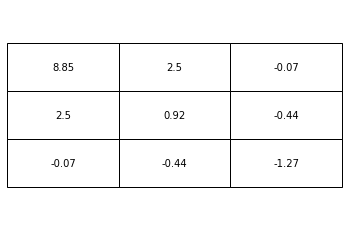

TD:


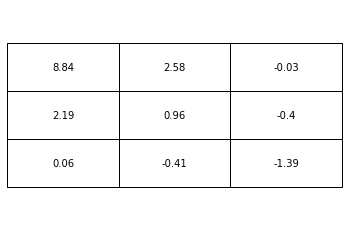

In [70]:
#################### Question 1(b) Policy evaluation and TD learning ####################
env = GridWorld()
print("policy evaluation:")
PEagent=VAgent(env,0.9)
for i in range(100):
    PEagent.evaluatePolicy()
PEagent.visual('valueonly')
print('TD:')
TDagent=VAgent(env,0.9)
TDagent.TDlearn()
TDagent.visual('qonly')

In [67]:
#################### Question 1(c) ####################
prev_values=[[0,0,0] for i in range(3)]
cur_values=[[0,0,0] for i in range(3)]
opt_policy=[['','',''] for i in range(3)]
iters=101
for t in range(iters):
    for i in range(3):
        for j in range(3):
            if i==0 and j==0:
                cur_values[i][j]=10+0.9*prev_values[2][2]
                if t==100:
                    opt_policy[i][j]='←↑↓→'
            else:
                if j!=0:
                    a=prev_values[i][j-1]*0.9
                else:
                    a=-1+prev_values[i][j]*0.9
                if j!=2:
                    b=prev_values[i][j+1]*0.9
                else:
                    b=-1+prev_values[i][j]*0.9
                if i!=0:
                    c=prev_values[i-1][j]*0.9
                else:
                    c=-1+prev_values[i][j]*0.9
                if i!=2:
                    d=prev_values[i+1][j]*0.9
                else:
                    d=-1+prev_values[i][j]*0.9
                cur_values[i][j]=max(a,b,c,d)
                if t==100:
                    if cur_values[i][j]==a:
                        opt_policy[i][j]+='←'
                    if cur_values[i][j]==c:
                        opt_policy[i][j]+='↑'
                    if cur_values[i][j]==d:
                        opt_policy[i][j]+='↓'
                    if cur_values[i][j]==b:
                        opt_policy[i][j]+='→'
                # if t==1 and i==0 and j==0:
                #     print(a,b,c,d)
    # print(cur_values,'\n')
    prev_values=cur_values[:]
    if t==20 or t==50 or t==100:
        for i in range(3):
            for j in range(3):
                cur_values[i][j]=round(cur_values[i][j],2)
        print("state-value functions at",t,"th iteration:")
        print(cur_values[0])
        print(cur_values[1])
        print(cur_values[2],'\n')
    if t==100:
        print("optimal policy")
        print(opt_policy[0])
        print(opt_policy[1])
        print(opt_policy[2],'\n')
    prev_values=cur_values[:]
    cur_values=[[0,0,0] for i in range(3)]

state-value functions at 20 th iteration:
[22.67, 19.31, 17.37]
[19.31, 17.37, 15.64]
[17.37, 15.64, 14.07] 

state-value functions at 50 th iteration:
[24.35, 21.86, 19.68]
[21.86, 19.68, 17.71]
[19.68, 17.71, 15.94] 

state-value functions at 100 th iteration:
[24.42, 21.98, 19.78]
[21.98, 19.78, 17.8]
[19.78, 17.8, 16.02] 

optimal policy
['←↑↓→', '←', '←']
['↑', '←↑', '←↑']
['↑', '←↑', '←↑'] 



policy iteration


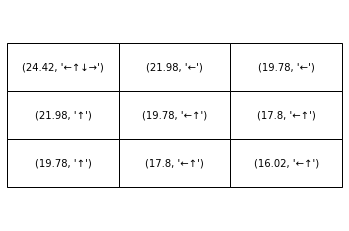

Q-learning


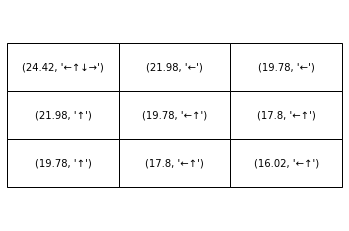

In [63]:
#################### Question 1(d)  policy-iteration and Q-learning  ####################
env = GridWorld()
print('policy iteration')
PIagent=VAgent(env,0.9)
for i in range(100):
    PIagent.evaluatePolicy()
    PIagent.updatePolicy()
PIagent.visual('combo')
print('Q-learning')
Qlagent=QAgent(env,0.9)
Qlagent.Qlearn()
Qlagent.visual('combo')

In [4]:
#################### Q2-(b)--Car Rental #################
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial
import time
logf=open('log_policy.txt','w')
def poisson(n, lam,poisson_val):
    key=n*100+lam
    if key not in poisson_val:
        poisson_val[key] =exp(-lam)*(lam**n)/factorial(n)
    return poisson_val[key]


def policy_evaluation(theta,gamma,debug,values,policy,poisson_val):
    while True:
        update_val = np.copy(values)
        k = np.arange(21)
        for i in range(21):
            for j in range(21):
                cur_state=[i,j]
                update_val[i][j]=compute_prob(gamma,debug,values, policy[i,j], cur_state,poisson_val)

        Delta = np.abs(update_val - values).sum()
        print('Delta',Delta)
        print('Delta',Delta,file=logf)
        values = update_val
        if Delta < theta:
            return values
def policy_improvement(gamma,actions, values, policy,poisson_val):
    update_policy = np.copy(policy)
    ret = np.zeros((21, 21, np.size(actions)))
    actions=np.array([i for i in range(-5,6)])
    actDict={}
    for i in range(len(actions)):
        actDict[actions[i]]=i
    for act in actions:
        for i in range(21):
            for j in range(21):
                cur_state=[i,j]
                if ((act >= 0 and i >= act) or (act < 0 and j >= abs(act))) == False:
                    tmpret=-float('inf')
                else:
                    tmpret = compute_prob(gamma,debug,values, act, cur_state,poisson_val)
                ret[i,j,actDict[act]]=tmpret
    
    for i in range(ret.shape[0]):
        for j in range(ret.shape[1]):
            update_policy[i, j] = actions[np.argmax(ret[i, j])]
    policy_stable = (update_policy != policy).sum()
    print('policy_stable',policy_stable)
    print('policy_stable',policy_stable,file=logf)
    return policy_stable, update_policy

def compute_prob(gamma,debug,values, action, state,poisson_val):
    ret = 0
    if action > 0:
        ret+=-2*(action-1)
    else:
        ret+=-2*abs(action)
    for req1 in range(debug):
        for req2 in range(debug):
            carinA=int(min(state[0] - action, 20))
            carinB=int(min(state[1] + action, 20))
            rentedA=min(carinA, req1)
            rentedB=min(carinB, req2)
            
            credit=10*(rentedA+rentedB)
            if carinA>=10:
                credit-=4
            if carinB>=10:
                credit-=4
            carinA-=rentedA
            carinB-=rentedB
            
            rentProb = poisson(req1, 3,poisson_val) *poisson(req2, 4,poisson_val)
            for a in range(debug):
                for b in range(debug):
                    carinA = min(carinA+a, 20)
                    carinB = min(carinB+b, 20)
                    returnProb = poisson(a, 3,poisson_val) * poisson(b, 2,poisson_val) * rentProb
                    ret+=returnProb*(credit+gamma*values[carinA,carinB])
    return ret

def ret_pi(gamma,debug,values, action, state,poisson_val):
    if ((action >= 0 and state[0] >= action) or (action < 0 and state[1] >= abs(action))) == False:
        return -float('inf')
    ret = compute_prob(gamma,debug,values, action, state,poisson_val)
    return ret

if __name__ == '__main__':
    theta=0.1
    # theta=30000
    gamma=0.9
    poisson_val={}
    debug=21
    actions=np.array([i for i in range(-5,6)])
    values = np.zeros((21, 21))
    policy = np.zeros(values.shape)
    iterations = 0
    while True:
        print('iteration',iterations)
        print('iteration',iterations,file=logf)
        print("policy evaluation")
        print("policy evaluation",file=logf)
        values = policy_evaluation(theta,gamma,debug,values, policy,poisson_val)
        print('policy improvement')
        print('policy improvement',file=logf)
        policy_stable, policy = policy_improvement(gamma,actions, values, policy,poisson_val)
        if policy_stable == 0:
            break
        iterations += 1
    logf.close()
    f=open('policy_res.txt','w')
    print(policy)
    print(policy,file=f)
    f.close()

iteration 0
policy evaluation
Delta 24926.99989546385
Delta 24419.633807247275
Delta 22121.6583091273
Delta 19928.1169926409
Delta 17938.70126003576
Delta 16145.517511030392
Delta 14531.103463847561
Delta 13078.01967904638
Delta 11770.222617553016
Delta 10593.201218582319
Delta 9533.881232305392
Delta 8580.493118718754
Delta 7722.443796245196
Delta 6950.199403826663
Delta 6255.1794513891
Delta 5629.661495309727
Delta 5066.695335902918
Delta 4560.025793419281
Delta 4104.023206093906
Delta 3693.620878295209
Delta 3324.258783993587
Delta 2991.8328997673625
Delta 2692.649604548663
Delta 2423.3846393733243
Delta 2181.0461711951048
Delta 1962.94155025404
Delta 1766.6473917921267
Delta 1589.9826495197635
Delta 1430.984381783703
Delta 1287.8859410954751
Delta 1159.0973447264512
Delta 1043.1876082191438
Delta 938.8688455725667
Delta 844.9819593691652
Delta 760.4837619485806
Delta 684.4353844272392
Delta 615.9918447873154
Delta 554.3926592216643
Delta 498.95339233120717
Delta 449.0580522235481
D

when ph is 0.4


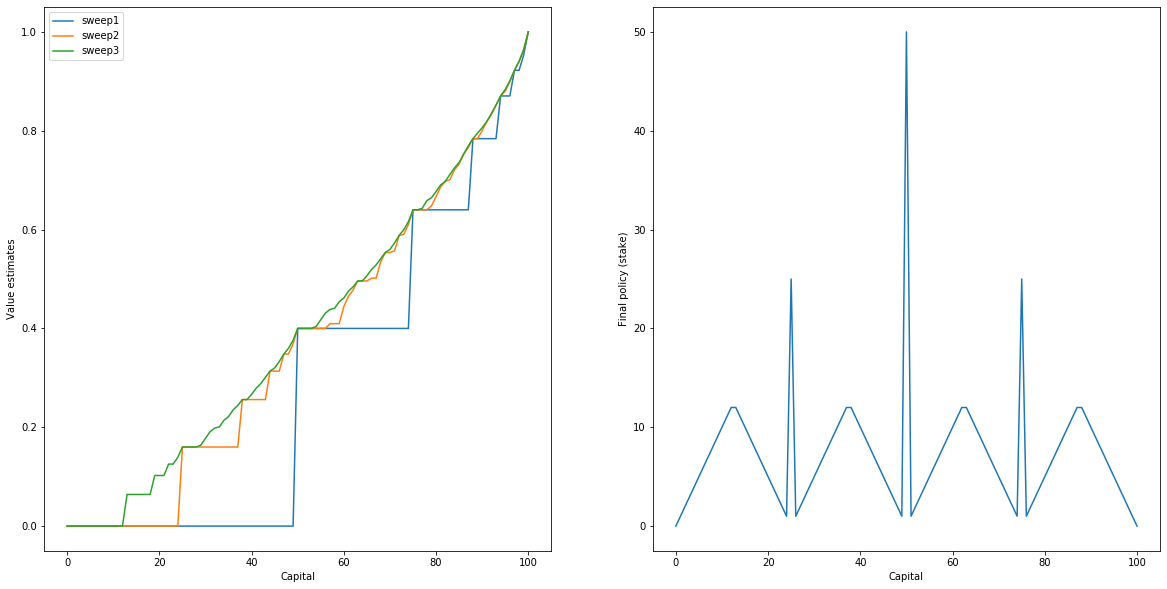

when ph is 0.25


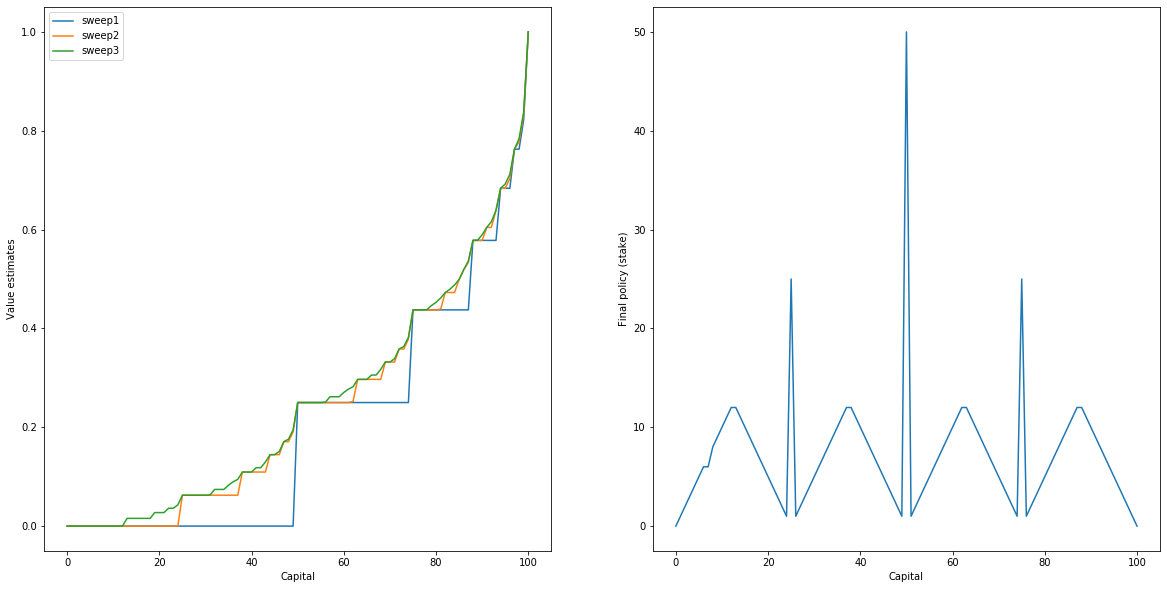

when ph is 0.55


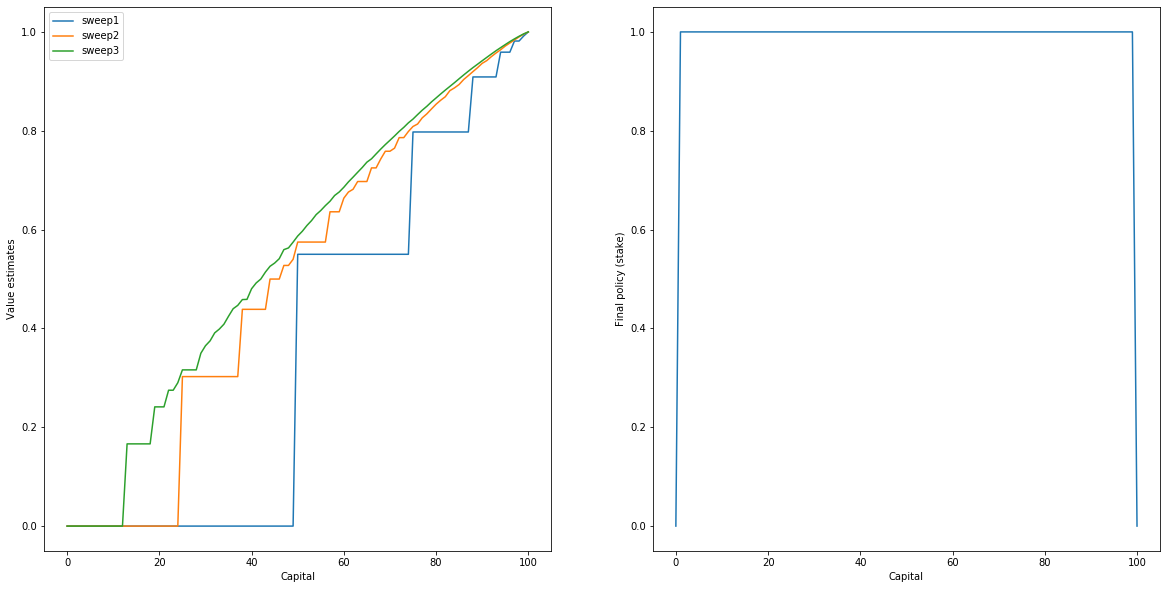

In [8]:
#################### Q2-(c)--Gambler #################
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def gamble(ph,theta):
    states=[i for i in range(101)]

    all_v=[0]*100
    all_v.append(1)
    sweeps=[all_v]
    while 1:
        update_v=all_v[:]
        for s in states[1:-1]:
            num=min(s,100-s)+1
            action=[i for i in range(num)]
            credit=[]
            for a in action:
                c=ph*update_v[s+a]+(1-ph)*update_v[s-a]
                credit.append(c)
            updated=max(credit)
            update_v[s]=updated
        diff=max(abs(np.array(update_v)-np.array(all_v)))
        all_v=update_v[:]
        sweeps.append(all_v)
        if diff<theta:
            break
#     print(all_v[:10])
    
    OPpolicy=[0]*101
    for s in states[1:-1]:
        num=min(s,100-s)+1
        action=[i for i in range(num)]
        credit=[]
        for a in action:
            c=ph*update_v[s+a]+(1-ph)*update_v[s-a]
            credit.append(c)
        rounded=np.round(credit[1:],4)
        OPpolicy[s]=action[np.argmax(rounded)+1]
    
    fig, (ax1, ax2)= plt.subplots(1,2, figsize = (20,10))
    # ax1.plot(states, OPpolicy)
    ax1.plot(sweeps[1],label='sweep1')
    ax1.plot(sweeps[2],label='sweep2')
    ax1.plot(sweeps[3],label='sweep3')
    ax1.set_xlabel('Capital')
    ax1.set_ylabel('Value estimates')
    ax1.legend()
    # ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=3)

    ax2.plot(states, OPpolicy)
    ax2.set_xlabel('Capital')
    ax2.set_ylabel('Final policy (stake)')
    plt.savefig('res_Q2_c.png')
    plt.show()


ph=[0.4,0.25,0.55]
theta=1e-9
for i in range(len(ph)):
    print('when ph is',ph[i])
    gamble(ph[i],theta)

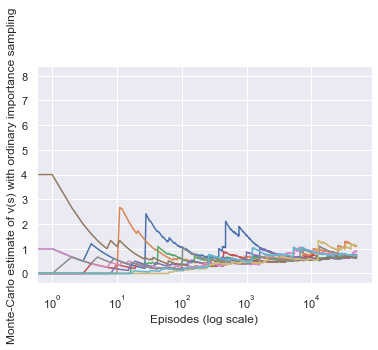

In [2]:
#################### Q2-(g)--Infinite Variance #################
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
import pandas as pd

runs = 10
episodes = 50000
for run in range(runs):
    all_r = []
    for episode in range(0, episodes):
        sample = []
        while 1:
            action = np.random.binomial(1, 0.5)
            sample.append(action)
            if action == 1:
                r=0
                break
            if np.random.binomial(1, 0.9) == 0:
                r=1
                break
        num=len(sample)
        if sample[num-1] == 1:
            rho = 0
        else:
            rho = 1.0 / (0.5**num)
        all_r.append(rho * r)
    all_r = np.add.accumulate(all_r)
    est=[]
    for i in range(1,episodes+1):
        est.append(all_r[i-1]/i)
    # estimations = np.asarray(all_r) / np.arange(1, episodes + 1)
    x=[i for i in range(episodes)]
    df=pd.DataFrame({'x':x,'y':est})
    sns.lineplot(x='x',y='y',data=df)
plt.xscale('log')
plt.xlabel('Episodes (log scale)')
plt.ylabel('Monte-Carlo estimate of v(s) with ordinary importance sampling')
plt.show()

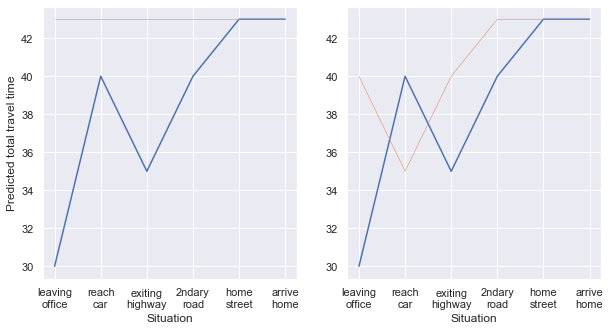

In [14]:
#################### Q2-(h)--Driving Home #################
# In jupyter notebook, conditions for a bug to be triggered are:
# use subplots with more than one axes.
# use annotations with an arrowprops argument.
# Therefore only plot without arrows is displayed, the code for arrow is annotated below
# The plot with arrows can be seen in pdf file
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", rc={"lines.linewidth": 3})
sns.set(color_codes=True)
import pandas as pd

pred_total_time=[30,40,35,40,43,43]
length=len(pred_total_time)
MC=[pred_total_time[-1]]*length
TD=pred_total_time[1:]
TD.append(pred_total_time[-1])
x=['leaving\noffice','reach\ncar','exiting\nhighway','2ndary\nroad','home\nstreet','arrive\nhome']
df=pd.DataFrame({'x':x,'y':pred_total_time,'mc':MC,'td':TD})
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x='x',y='y',data=df,ax=ax1,sort=False)

sns.lineplot(x='x',y='y',data=df,ax=ax2,sort=False)

# sns.set_linestyle(":")
sns.set(style="darkgrid", rc={"lines.linewidth": 0.5})
sns.lineplot(x='x',y='mc',data=df,ax=ax1,sort=False,dashes=True,linestyle=':')
# ax1.annotate('', xy=(0,43), xytext=(0,30),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax1.annotate('', xy=(1,43), xytext=(1,40),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax1.annotate('', xy=(2,43), xytext=(2,35),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax1.annotate('', xy=(3,43), xytext=(3,40),arrowprops=dict(facecolor='red', shrink=0.01),)
sns.lineplot(x='x',y='td',data=df,ax=ax2,sort=False,dashes=True,linestyle=':')
# ax2.annotate('', xy=(0,40), xytext=(0,30),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax2.annotate('', xy=(1,35), xytext=(1,40),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax2.annotate('', xy=(2,40), xytext=(2,35),arrowprops=dict(facecolor='red', shrink=0.01),)
# ax2.annotate('', xy=(3,43), xytext=(3,40),arrowprops=dict(facecolor='red', shrink=0.01),)
ax1.set(xlabel='Situation', ylabel='Predicted total travel time')
ax2.set(xlabel='Situation', ylabel='')
plt.show()


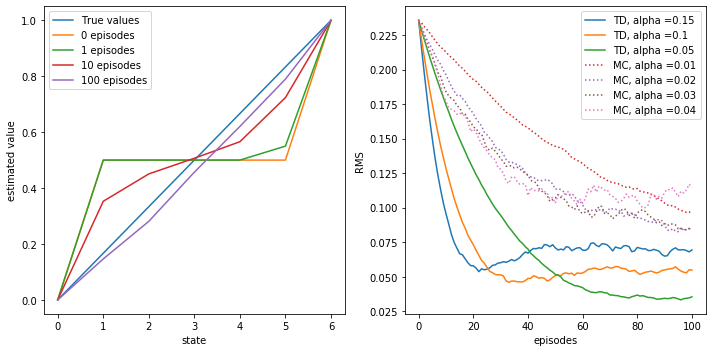

In [2]:
#################### Q2-(i)--Example 6.2 Random Walk #################
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def TD(values, alpha):
    v = 3
    sample = [v]
    rewards = [0]
    
    while True:
        old_v = v
        if np.random.binomial(1, 0.5) == 0:
            v -= 1
        else:
            v += 1
        reward = 0
        sample.append(v)
        values[old_v] += alpha * (reward + values[v] - values[old_v])
        if v == 6 or v == 0:
            break
        rewards.append(reward)
    return sample, rewards

def MC(values, alpha):
    v = 3
    sample = [3]
    while True:
        if np.random.binomial(1, 0.5) == 0:
            v -= 1
        else:
            v += 1
        sample.append(v)
        if v == 6:
            rewards = 1.0
            break
        elif v == 0:
            rewards = 0.0
            break
    for i in sample[:-1]:
        values[i] += alpha * (rewards - values[i])
    return sample, [rewards] * (len(sample) - 1)

tval = np.array([i/6 for i in range(7)])
value = np.ones(7)
value[0]=0
value[1:6].fill(0.5)
plt.figure(figsize=(10,5))
plt.subplot(121)
episodes = [0, 1, 10, 100]
curVal = np.copy(value)
plt.figure(1)
plt.plot(tval, label='True values')
for i in range(episodes[-1] + 1):
    if i in episodes:
        plt.plot(curVal, label=str(i) + ' episodes')
    TD(curVal,0.1)
plt.xlabel('state')
plt.ylabel('estimated value')
plt.legend()
plt.subplot(122)
tdAlpha = [0.15, 0.1, 0.05]
mcAlpha = [0.01, 0.02, 0.03, 0.04]
episodes = 100 + 1
runs = 100
for i in range(len(tdAlpha)):
    Error = np.zeros(episodes)
    for j in range(runs):
        e = []
        curVal = np.copy(value)
        for k in range(0, episodes):
            squareE=np.sum((tval - curVal)**2) / 5.0
            e.append(np.sqrt(squareE))
            TD(curVal, alpha=tdAlpha[i])
        Error += np.asarray(e)
    Error /= runs
    plt.plot(Error, linestyle='solid', label='TD, alpha ='+str(tdAlpha[i]))

for i in range(len(mcAlpha)):
    Error = np.zeros(episodes)
    for j in range(runs):
        e = []
        curVal = np.copy(value)
        for k in range(0, episodes):
            squareE=np.sum((tval - curVal)**2) / 5.0
            e.append(np.sqrt(squareE))
            MC(curVal, alpha=mcAlpha[i])
        Error += np.asarray(e)
    Error /= runs
    plt.plot(Error, linestyle='dotted', label='MC, alpha ='+str(mcAlpha[i]))

plt.xlabel('episodes')
plt.ylabel('RMS')
plt.legend()
plt.tight_layout()
plt.show()

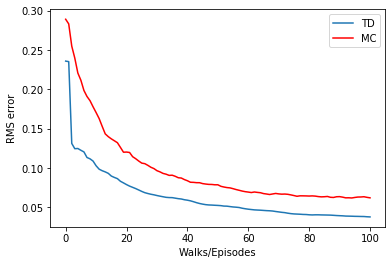

In [4]:
#################### Q2-(j)--Example 6.3 Random walk under batch updating #################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def TD(values, alpha):
    v = 3
    sample = [v]
    rewards = [0]
    while True:
        old_v = v
        if np.random.binomial(1, 0.5) == 0:
            v -= 1
        else:
            v += 1
        reward = 0
        sample.append(v)
        if v == 6 or v == 0:
            break
        rewards.append(reward)
    return sample, rewards

def MC(values, alpha):
    v = 3
    sample = [3]
    while True:
        if np.random.binomial(1, 0.5) == 0:
            v -= 1
        else:
            v += 1
        sample.append(v)
        if v == 6:
            rewards = 1.0
            break
        elif v == 0:
            rewards = 0.0
            break
    return sample, [rewards] * (len(sample) - 1)

def Batch_update(method, episodes, alpha=0.001):
    runs = 100
    Error = np.zeros(episodes)
    for r in range(runs):
        curVal = np.ones(7)
        curVal[0]=0
        curVal[1:6].fill(0.5)
        e = []
        Samples = []
        rewards = []
        for iters in range(episodes):
            if method == 'TD':
                sample, r = TD(curVal,0.1)
            else:
                sample, r = MC(curVal,0.1)
            Samples.append(sample)
            rewards.append(r)
            while True:
                updates = np.zeros(7)
                for s in range(len(Samples)):
                    for i in range(0, len(Samples[s]) - 1):
                        if method == 'TD':
                            updates[Samples[s][i]] += rewards[s][i] + curVal[Samples[s][i + 1]] - curVal[Samples[s][i]]
                        else:
                            updates[Samples[s][i]] += rewards[s][i] - curVal[Samples[s][i]]
                updates *= alpha
                if np.sum(np.abs(updates)) < 0.001:
                    break
                curVal += updates
            tval = np.array([i/6 for i in range(7)])
            e.append(np.sqrt(np.sum(np.power(curVal - tval, 2)) / 5.0))
        Error += np.asarray(e)
    Error /= runs
    return Error


episodes = 100 + 1
TDalgo = Batch_update('TD', episodes)
MCalgo = Batch_update('MC', episodes)
plt.plot(TDalgo, label='TD')
plt.plot(MCalgo, color='red',label='MC')
plt.xlabel('Walks/Episodes')
plt.ylabel('RMS error')
plt.legend()
plt.show()

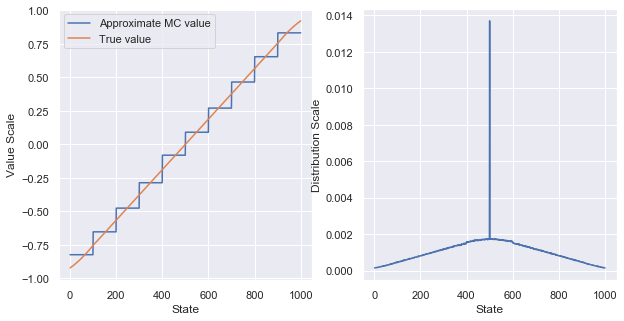

In [2]:
#################### Q2-(p)--Example 9.1: State Aggregation on the 1000-state Random Walk #################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd

all_states=[i for i in range(1,1001)]
# state-act(reward)->next state
def take_act(state, action):
    step = np.random.randint(1, 101)
    state += step*action
    state = min(state, 1001)
    state=max(state,0)
    if state == 0:
        reward = -1
    elif state == 1001:
        reward = 1
    else:
        reward = 0
    return state, reward

def findV(thetas,state):
    if state==0 or state==1001:
            return 0
    idx = (state - 1) // 100
    return thetas[idx]

def Gradient_MC(thetas, alpha, distribution):
    state = 500
    samples = [state]
    reward = 0.0
    while state!=0 and state!=1001:
        if np.random.binomial(1, 0.5) == 0:
            action=-1
        else:
            action=1
        nstate, reward = take_act(state, action)
        samples.append(nstate)
        state = nstate

    for state in samples[:-1]:
        val=findV(thetas,state)
        delta = alpha * (reward - val)
        idx=(state - 1) // 100
        thetas[idx]+=delta
        distribution[state] += 1

trueVal = np.arange(-1001, 1003, 2) / 1001.0 
# find true values of state,rewards=0
while True:
    old_value = np.copy(trueVal)
    for state in all_states:
        trueVal[state] = 0
        for action in [-1,1]:
            for run in range(1, 101):
                run *= action
                nstate = min(state + run,1001)
                nstate = max(nstate, 0)
                trueVal[state] += 1.0 / (200) * trueVal[nstate]
    error = np.sum(np.abs(old_value - trueVal))
    if error < 0.01:
        break
trueVal[0] = 0
trueVal[-1] = 0

episodes = 100000
alpha = 0.00002
thetas = np.zeros(10)

distri = np.zeros(1002)
for e in range(episodes):
    Gradient_MC(thetas, alpha, distri)
distri /= np.sum(distri)
Values = [findV(thetas,i) for i in all_states]

df=pd.DataFrame({'State':all_states,'Approximate MC value':Values,'True value':trueVal[1:-1],'State distribution':distri[1:-1]})
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.lineplot(x='State', y='Approximate MC value', data=df,label='Approximate MC value')
sns.lineplot(x='State', y='True value',data=df,label='True value')
plt.xlabel('State')
plt.ylabel('Value Scale')
plt.legend()

plt.subplot(122)
sns.lineplot(x='State', y='State distribution',data=df)
plt.xlabel('State')
plt.ylabel('Distribution Scale')
plt.show()


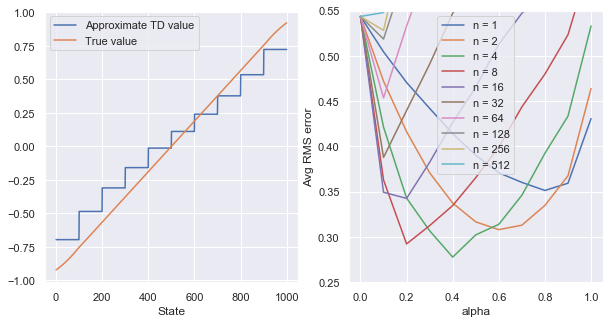

In [5]:
#################### Q2-(q)--Example 9.2: Bootstrapping on the 1000-state RandomWalk #################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd
all_states=[i for i in range(1,1001)]

# state-act(reward)->next state
def take_act(state, action):
    step = np.random.randint(1, 101)
    state += step*action
    state = min(state, 1001)
    state = max(state,0)
    if state == 0:
        reward = -1
    elif state == 1001:
        reward = 1
    else:
        reward = 0
    return state, reward

def findV(thetas,state):
    if state==0 or state==1001:
            return 0
    if len(thetas)==10:
        idx = (state - 1) // 100
    else:
        idx = (state - 1) // 50
    return thetas[idx]

# n-step semi-gradient TD for estimating \sim{v} = v_{\pi}
def semiGradient_TD(thetas, n, alpha):
    time = 0
    T = float('inf')
    rewards = [0]
    state = 500
    states = [500]
    while 1:#loop until tau=T-1
        time += 1
        if time < T:
            if np.random.binomial(1, 0.5) == 0:
                action=-1
            else:
                action=1
            nstate, reward = take_act(state, action)
            states.append(nstate)
            rewards.append(reward)
            if nstate==0 or nstate==1001: #terminal
                T = time
        tau = time - n #tau is the time whose state’s estimate is being updated)

        if tau >= 0:
            returns = 0.0
            for t in range(tau + 1, min(T, tau + n) + 1):
                returns += rewards[t]
            if tau + n <= T:
                returns += findV(thetas,states[tau + n])
            newState = states[tau]
            if newState!=0 and newState!=1001:
                delta = alpha * (returns - findV(thetas,newState))
                if len(thetas)==10:
                    idx=(newState - 1) // 100
                else:
                    idx=(newState - 1) // 50
                thetas[idx]+=delta
        if tau == T - 1:
            break
        state = nstate
    
trueVal = np.arange(-1001, 1003, 2) / 1001.0
# find true values of state,rewards=0
while True:
    old_value = np.copy(trueVal)
    for state in all_states:
        trueVal[state] = 0
        for action in [-1,1]:
            for run in range(1, 101):
                run *= action
                nstate = min(state + run,1001)
                nstate = max(nstate, 0)
                trueVal[state] += 1.0 / (200) * trueVal[nstate]
    error = np.sum(np.abs(old_value - trueVal))
    if error < 1e-2:
        break

trueVal[0] = 0
trueVal[-1] = 0
plt.figure(figsize=(10,5))
plt.subplot(121)
episodes = 100000
alpha = 0.0002
thetas = np.zeros(10)
for e in range(episodes):
    semiGradient_TD(thetas, 1, alpha)
stateValues = [findV(thetas,i) for i in all_states]
df=pd.DataFrame({'State':all_states,'Approximate TD value':stateValues,'True value':trueVal[1:-1]})
sns.lineplot(x='State', y='Approximate TD value', data=df,label='Approximate TD value')
sns.lineplot(x='State', y='True value', data=df,label='True value')
plt.xlabel('State')
plt.ylabel('')
plt.legend()

plt.subplot(122)
req_episodes=[]
for i in range(10):
    req_episodes.append(2**i)
alphas = np.arange(0, 1.1, 0.1)
episodes = 10
errors = np.zeros((10, 11))

for run in range(100):
    for i in range(10):
        for j in range(11):
            thetas = np.zeros(20)
            # print('e')
            for e in range(0, episodes):
                semiGradient_TD(thetas, req_episodes[i], alphas[j])
                #rms
                state_value = np.asarray([findV(thetas,i) for i in all_states])
                errors[i, j] += np.sqrt(np.sum((state_value - trueVal[1: -1])**2) / 1000)
errors /= episodes * 100

for i in range(10):
    plt.plot(alphas, errors[i, :], label='n = ' + str(req_episodes[i]))
plt.xlabel('alpha')
plt.ylabel('Avg RMS error')
plt.ylim([0.25, 0.55])
plt.legend()

plt.show()

Please choose an option:
0:Policy Evaluation (one sweep)
1:Policy Update
2:Toggle Value Iteration
3:Reset
0


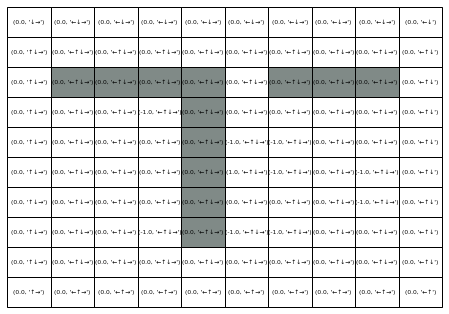

Please choose an option:
0:Policy Evaluation (one sweep)
1:Policy Update
2:Toggle Value Iteration
3:Reset
1


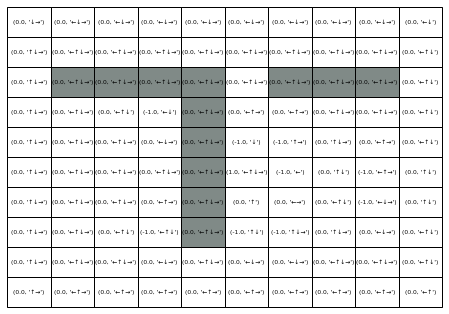

Please choose an option:
0:Policy Evaluation (one sweep)
1:Policy Update
2:Toggle Value Iteration
3:Reset
2


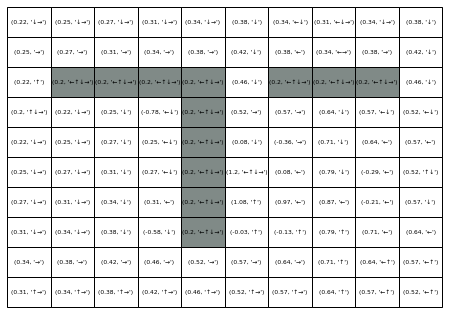

Please choose an option:
0:Policy Evaluation (one sweep)
1:Policy Update
2:Toggle Value Iteration
3:Reset
3


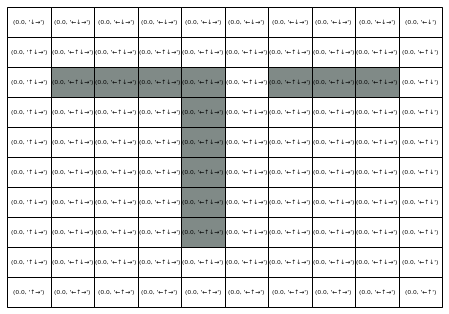

Please choose an option:
0:Policy Evaluation (one sweep)
1:Policy Update
2:Toggle Value Iteration
3:Reset


In [ ]:
################ REINFORCEjs--GridWorld: Dynamic Programming Demo ###################
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time

def sampleWeighted(p):
  r = random.random()
  c = 0.0
  for i in range(len(p)):
    c += p[i]
    if c >= r:
        return i
  print("should not be here!")

def reshapeArr(arr,indi):
    # if indi=='p':
    #     res=[['' for i in range(10)] for j in range(10)]
    # else:
    res=np.zeros((10,10))
    for i in range(10):
        for j in range(10):
                # print(j*10+i)
            res[i][j]+=arr[j*10+i]
    return res


# If you'd like to use the REINFORCEjs Dynamic Programming for your MDP, 
# you have to define an environment object `env` that has a few methods 
# that the DP agent will need:
class GridWorld:
    def __init__(self):
        self.Rarr=None # reward array
        self.T=None # cell types, 0 = normal, 1 = cliff
        self.reset()
    def reset(self):
        self.gh=10
        self.gw=10
        self.gs=self.gh*self.gw
        Rarr=np.zeros(self.gs)
        T=np.zeros(self.gs)
        Rarr[55] = 1
        Rarr[54] = -1
        #Rarr[63] = -1
        Rarr[64] = -1
        Rarr[65] = -1
        Rarr[85] = -1
        Rarr[86] = -1
        Rarr[37] = -1
        Rarr[33] = -1
        # Rarr[77] = -1
        Rarr[67] = -1
        Rarr[57] = -1
        # make some cliffs
        for q in range(8): 
            off = (q+1)*self.gh+2
            T[off] = 1
            Rarr[off] = 0
        for q in range(6):
            off = 4*self.gh+q+2
            T[off] = 1
            Rarr[off] = 0
        # make a hole
        T[5*self.gh+2] = 0
        Rarr[5*self.gh+2] = 0; 
        self.Rarr = Rarr
        self.T = T
    # returns a float for the reward achieved by the agent for the `s`, `a`, `ns` transition. 
    # In the simplest case, the reward is usually based only the state `s`.
    def reward(self,s,a,ns):
        return self.Rarr[s]
    # a misnomer, since right now the library assumes deterministic MDPs 
    # that have a single unique new state for every (state, action) pair. Therefore,
    # the function should return a single integer that identifies the next state of the world
    def nextStateDistribution(self,s,a):
        if self.T[s]==1:
            # cliff! oh no!
            ns=0
            # pass
        elif s==55:
            # agent wins! teleport to start
            ns = self.startState()
            while self.T[ns]==1:
                ns=self.randomState()
        else:
            nx=ny=0
            x=self.stox(s)
            y = self.stoy(s)
            if a == 0:
                nx=x-1
                ny=y
            if a == 1:
                nx=x
                ny=y-1
            if a == 2:
                nx=x
                ny=y+1
            if a == 3:
                nx=x+1
                ny=y
            ns = nx*self.gh+ny
            if self.T[ns]==1:
                ns=s
        return ns

    def sampleNextState(self,s,a):
        ns = self.nextStateDistribution(s,a)
        # observe the raw reward of being in s, taking a, and ending up in ns
        r = self.Rarr[s]
        # every step takes a bit of negative reward
        r -= 0.01
        out = {'ns':ns, 'r':r}
        if s == 55 and ns == 0:
          # episode is over
          out['reset_episode'] = True
        return out

    # takes an integer `s` and returns a list of available actions, 
    # which should be integers from zero to `maxNumActions`
    def allowedActions(self,s):
        x = self.stox(s)
        y = self.stoy(s)
        asVal = []
        if x > 0:
            asVal.append(0)
        if y > 0:
            asVal.append(1)
        if y < self.gh-1:
            asVal.append(2)
        if x < self.gw-1:
            asVal.append(3)
        return asVal
    def randomState(self):
        return math.floor(random.random()*self.gs)
    def startState(self):
        return 0
    # returns an integer of total number of states
    def getNumStates(self):
        return self.gs
    # returns an integer with max number of actions in any state
    def getMaxNumActions(self):
        return 4
    
    # private functions
    def stox(self,s):
        return math.floor(s/self.gh)
    def stoy(self,s):
        return s % self.gh
    def xytos(self,x,y):
        return x*self.gh + y

class DPAgent:
    def __init__(self,env,opt=0.75):
        self.V=None
        self.P=None
        self.env=env
        self.gamma=opt
        self.reset()
    def reset(self):
        self.ns=self.env.getNumStates()
        self.na = self.env.getMaxNumActions()
        self.V = np.zeros(self.ns)
        self.P = np.zeros(self.ns*self.na)
        # initialize uniform random policy
        for s in range(self.ns):
            poss = self.env.allowedActions(s)
            for i in range(len(poss)):
               self.P[poss[i]*self.ns+s] = 1.0 / len(poss)

        colors = [["w"]*10 for i in range(10)]
        for i in range(10):
            for j in range(10):
                if self.env.T[i+j*10]==1:
                    colors[i][j]="#808A87"
        self.colors=colors
        # print(self.colors)
    def act(self,s):
        # behave according to the learned policy
        poss = self.env.allowedActions(s)
        ps = []
        for i in range(len(poss)):
            a = poss[i]
            prob = self.P[a*self.ns+s]
            ps.append(prob)
        maxi = sampleWeighted(ps)
        return poss[maxi]

    def learn(self):
        self.evaluatePolicy() # writes self.V
        self.updatePolicy() # writes self.P

    def evaluatePolicy(self):
        # print(self.V)
        # print(self.ns)
        Vnew = np.zeros(self.ns)
        for s in range(self.ns):
            v=0.0
            poss=self.env.allowedActions(s)
            for i in range(len(poss)):
                a = poss[i]
                # probability of taking action under policy
                prob = self.P[a*self.ns+s]
                # no contribution, skip for speed
                if prob==0:
                    continue
                ns=self.env.nextStateDistribution(s,a)
                # reward for s->a->ns transition
                rs = self.env.reward(s,a,ns)
                v += prob * (rs + self.gamma * self.V[ns])
            Vnew[s] = v
        self.V = Vnew
        # print(self.V)

    # update policy to be greedy w.r.t. learned Value function
    def updatePolicy(self):
        for s in range(self.ns):
            poss=self.env.allowedActions(s)
            # compute value of taking each allowed action
            vmax=nmax=0
            vs=[]
            for i in range(len(poss)):
                a=poss[i]
                ns=self.env.nextStateDistribution(s,a)
                rs = self.env.reward(s,a,ns)
                v = rs + self.gamma * self.V[ns]
                vs.append(v)
                if i==0 or v>vmax:
                    vmax=v
                    nmax=1
                elif v==vmax:
                    nmax+=1
            for i in range(len(poss)):
                a=poss[i]
                if vs[i] == vmax:
                    self.P[a*self.ns+s]=1.0/nmax
                else:
                    self.P[a*self.ns+s]=0.0
        # print(self.P[:40])
    
    def visual(self):
        # print(self.P)
        curP=[['' for i in range(10)] for j in range(10)]
        # handle Policy
        for y in range(10):
            for x in range(10):
                s = self.env.xytos(x,y)
                ssArr=[]
                for a in range(4):
                    prob = self.P[a*100+s]
                    ss = prob * 0.9
                    ssArr.append(ss)
                opt=max(ssArr)
                if opt!=0:
                    if ssArr[0]==opt:
                        curP[y][x]+='←'
                    if ssArr[1]==opt:
                        curP[y][x]+='↑'
                    if ssArr[2]==opt:
                        curP[y][x]+='↓'
                    if ssArr[3]==opt:
                        curP[y][x]+='→'
        
        # handle Value
        curV=reshapeArr(self.V,'v')
        for i in range(10):
            for j in range(10):
                curV[i][j]=round(curV[i][j],2)

        combo=[[[] for i in range(10)] for j in range(10)]
        for i in range(10):
            for j in range(10):
                combo[i][j]=(curV[i][j],curP[i][j])

        
        ytable=plt.table(cellText=combo, cellColours=self.colors,colWidths=[0.13 for i in range(10)],loc=(0, 0), cellLoc='center')
        # ytable1=plt.table(cellText=reshapeArr(self.V), cellColours=self.colors,colWidths=[0.1 for i in range(10)],loc=(0, 0), cellLoc='center')
        ytable.scale(1,2.5)
        ytable.auto_set_font_size(False)
        ytable.set_fontsize(6)
        plt.axis('off')
        plt.show()



env = GridWorld()
# print(curenv.getNumStates())#8
dpagent=DPAgent(env,0.9)
# dpagent.evaluatePolicy()
# dpagent.visual()
options=[0,1,2,3]
while 1:
    print('Please choose an option:')
    print('0:Policy Evaluation (one sweep)')
    print('1:Policy Update') 
    print('2:Toggle Value Iteration')
    print('3:Reset')
    n=int(input())
    if n not in options:
        print('invalid input')
        pass
    elif n==0:
        dpagent.evaluatePolicy()
        dpagent.visual()
    elif n==1:
        dpagent.updatePolicy()
        dpagent.visual()
    elif n==2:
        for i in range(100):
            dpagent.evaluatePolicy()
            dpagent.updatePolicy()
            # time.sleep(0.5)
        dpagent.visual()
    elif n==3:
        env.reset()
        dpagent.reset()
        dpagent.visual()

In [ ]:
################ REINFORCEjs--GridWorld: Temporal Difference Learning Gridworld Demo ###################
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time
from time import sleep
plt.ion()

def sampleWeighted(p):
  r = random.random()
  c = 0.0
  for i in range(len(p)):
    c += p[i]
    if c >= r:
        return i
def reshapeArr(arr,indi):
    # if indi=='p':
    #     res=[['' for i in range(10)] for j in range(10)]
    # else:
    res=np.zeros((10,10))
    for i in range(10):
        for j in range(10):
                # print(j*10+i)
            res[i][j]+=arr[j*10+i]
    return res
def setConst(arr, c):
    for i in range(len(arr)):
        arr[i] = c
def randi(a,b):
    return math.floor(random.random()*(b-a)+a)

def selectionsort(arr):
    n=len(arr)
    # min_idx=0
    for i in range(n):
        min_idx=i
        for j in range(i+1,n):
            if arr[j]['p']<arr[min_idx]['p']:
                min_idx=j
        tmp=arr[min_idx]
        arr[min_idx]=arr[i]
        arr[i]=tmp

# If you'd like to use the REINFORCEjs Dynamic Programming for your MDP, 
# you have to define an environment object `env` that has a few methods 
# that the DP agent will need:
class GridWorld:
    def __init__(self):
        self.Rarr=None # reward array
        self.T=None # cell types, 0 = normal, 1 = cliff
        self.reset()
    def reset(self):
        self.gh=10
        self.gw=10
        self.gs=self.gh*self.gw
        Rarr=np.zeros(self.gs)
        T=np.zeros(self.gs)
        Rarr[55] = 1
        Rarr[54] = -1
        #Rarr[63] = -1
        Rarr[64] = -1
        Rarr[65] = -1
        Rarr[85] = -1
        Rarr[86] = -1
        Rarr[37] = -1
        Rarr[33] = -1
        # Rarr[77] = -1
        Rarr[67] = -1
        Rarr[57] = -1
        # make some cliffs
        for q in range(8): 
            off = (q+1)*self.gh+2
            T[off] = 1
            Rarr[off] = 0
        for q in range(6):
            off = 4*self.gh+q+2
            T[off] = 1
            Rarr[off] = 0
        # make a hole
        T[5*self.gh+2] = 0
        Rarr[5*self.gh+2] = 0 
        self.Rarr = Rarr
        self.T = T
    # returns a float for the reward achieved by the agent for the `s`, `a`, `ns` transition. 
    # In the simplest case, the reward is usually based only the state `s`.
    def reward(self,s,a,ns):
        return self.Rarr[s]
    # a misnomer, since right now the library assumes deterministic MDPs 
    # that have a single unique new state for every (state, action) pair. Therefore,
    # the function should return a single integer that identifies the next state of the world
    def nextStateDistribution(self,s,a):
        if self.T[s]==1:
            # cliff! oh no!
            ns=0
            # pass
        elif s==55:
            # agent wins! teleport to start
            ns = self.startState()
            while self.T[ns]==1:
                ns=self.randomState()
        else:
            nx=ny=0
            x=self.stox(s)
            y = self.stoy(s)
            if a == 0:
                nx=x-1
                ny=y
            if a == 1:
                nx=x
                ny=y-1
            if a == 2:
                nx=x
                ny=y+1
            if a == 3:
                nx=x+1
                ny=y
            ns = nx*self.gh+ny
            if self.T[ns]==1:
                ns=s
        return ns

    def sampleNextState(self,s,a):
        ns = self.nextStateDistribution(s,a)
        # observe the raw reward of being in s, taking a, and ending up in ns
        r = self.Rarr[s]
        # every step takes a bit of negative reward
        r -= 0.01
        out = {'ns':ns, 'r':r}
        out['reset_episode'] = False
        if s == 55 and ns == 0:
          # episode is over
          out['reset_episode'] = True
        return out

    # takes an integer `s` and returns a list of available actions, 
    # which should be integers from zero to `maxNumActions`
    def allowedActions(self,s):
        x = self.stox(s)
        y = self.stoy(s)
        asVal = []
        if x > 0:
            asVal.append(0)
        if y > 0:
            asVal.append(1)
        if y < self.gh-1:
            asVal.append(2)
        if x < self.gw-1:
            asVal.append(3)
        return asVal
    def randomState(self):
        return math.floor(random.random()*self.gs)
    def startState(self):
        return 0
    # returns an integer of total number of states
    def getNumStates(self):
        return self.gs
    # returns an integer with max number of actions in any state
    def getMaxNumActions(self):
        return 4
    
    # private functions
    def stox(self,s):
        return math.floor(s/self.gh)
    def stoy(self,s):
        return s % self.gh
    def xytos(self,x,y):
        return x*self.gh + y

class DynamicUpdate:
    def __init__(self,data,colors):
        self.a=0
        self.b=0
        self.data=data
        self.colors=colors
    def on_launch(self):
        self.figure, self.ax = plt.subplots()
        self.mytable=plt.table(cellText=self.data, cellColours=self.colors,colWidths=[0.13 for i in range(10)],loc=(0, 0), cellLoc='center')
        # self.mytable=plt.table(cellText=self.data,loc=(0, 0), cellLoc='center')
        self.mytable[(self.a,self.b)].set_facecolor("#ffff00")
        self.mytable.scale(1,2.5)
        self.mytable.auto_set_font_size(False)
        self.mytable.set_fontsize(6)
        plt.axis('off')
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()
        # plt.show()
        # plt.pause(15)

    def on_running(self,a,b,combo):
        self.data=combo
        self.mytable[(self.a,self.b)].set_facecolor("#ffffff")
        for i in range(10):
            for j in range(10):
                tmp=self.data[i][j]
                self.mytable.get_celld()[(i, j)].get_text().set_text(tmp)
        self.mytable[(a,b)].set_facecolor("#ffff00")
        self.a=a
        self.b=b
        # print(self.data)
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    def __call__(self):
        import numpy as np
        import time
        self.on_launch()
        for i in range(2):
            for j in range(2):
                self.data[i][j]+=1
                self.on_running(i,j)
                time.sleep(1)
        return self.data


class TDAgent:
    def __init__(self,env,update='qlearn',gamma=0.75,epsilon=0.1,alpha=0.01,\
            smooth_policy_update=False,beta=0.01,lamb=0,replacing_traces=True,\
            q_init_val=0,planN=0):
        self.update = update # qlearn | sarsa
        self.gamma = gamma # future reward discount factor
        self.epsilon = epsilon # for epsilon-greedy policy
        self.alpha = alpha # value function learning rate
        
        # class allows non-deterministic policy, and smoothly regressing towards the optimal policy based on Q
        self.smooth_policy_update = smooth_policy_update
        self.beta = beta #learning rate for policy, if smooth updates are on

        # eligibility traces
        self.lamb=lamb
        self.replacing_traces = replacing_traces 

        # optional optimistic initial values
        self.q_init_val = q_init_val
        # number of planning steps per learning iteration (0 = no planning)
        self.planN=planN

        self.Q=None
        self.P=None
        self.e=None
        self.env_model_s=None
        self.env_model_r=None
        self.env=env
        self.steps_per_tick = 0
        self.dynaimg=None

        self.reset()

    def reset(self):
        self.ns = self.env.getNumStates()
        self.na = self.env.getMaxNumActions()
        self.Q = np.zeros(self.ns * self.na)
        if self.q_init_val != 0:
            setConst(self.Q, self.q_init_val)
        self.P = np.zeros(self.ns * self.na)
        self.e = np.zeros(self.ns * self.na)

        #  model/planning vars
        self.env_model_s = np.zeros(self.ns * self.na)
        # init to -1 so we can test if we saw the state before
        setConst(self.env_model_s, -1) 
        self.env_model_r = np.zeros(self.ns * self.na)
        self.sa_seen = []
        self.pq = np.zeros(self.ns * self.na)

        # initialize uniform random policy
        for s in range(self.ns):
            poss = self.env.allowedActions(s)
            for i in range(len(poss)):
                self.P[poss[i]*self.ns+s] = 1.0 / len(poss)
        # agent memory, needed for streaming updates
        # (s0,a0,r0,s1,a1,r1,...)
        self.r0 = None
        self.s0 = None
        self.s1 = None
        self.a0 = None
        self.a1 = None

        colors = [["w"]*10 for i in range(10)]
        for i in range(10):
            for j in range(10):
                if self.env.T[i+j*10]==1:
                    colors[i][j]="#808A87"
        self.colors=colors
    # def resetEpisode:
        # an episode finished
    def act(self,s):
        # act according to epsilon greedy policy
        poss = self.env.allowedActions(s)
        probs = []
        for i in range(len(poss)):
            probs.append(self.P[poss[i]*self.ns+s])
        # epsilon greedy policy
        if random.random()<self.epsilon:
            # random available action
            a = poss[randi(0,len(poss))]
            self.explored = True
        else:
            a = poss[sampleWeighted(probs)]
            self.explored = False
        # shift state memory
        self.s0 = self.s1
        self.a0 = self.a1
        self.s1 = s
        self.a1 = a
        return a
    def learn(self,r1):
        if self.r0!=None:
            self.learnFromTuple(self.s0, self.a0, self.r0, self.s1, self.a1, self.lamb)
            if self.planN > 0:
                self.updateModel(self.s0, self.a0, self.r0, self.s1)
                self.plan()
        #  store this for next update
        self.r0 = r1
    def updateModel(self,s0, a0, r0, s1):
        # transition (s0,a0) -> (r0,s1) was observed. Update environment model
        sa = a0 * self.ns + s0
        if self.env_model_s[sa] == -1:
            # first time we see this state action
            self.sa_seen.append(a0 * self.ns + s0) # add as seen state
        self.env_model_s[sa] = s1
        self.env_model_r[sa] = r0

    def plan(self):
        # order the states based on current priority queue information
        spq = []
        for i in range(len(self.sa_seen)):
            sa = self.sa_seen[i]
            sap = self.pq[sa]
            if sap > 1e-5:# gain a bit of efficiency
                spq.append({'sa':sa, 'p':sap})
        # sort spq according to p value
        # spq.sort(function(a,b){ return a.p < b.p ? 1 : -1})
        selectionsort(spq)
        spq.reverse()
        # perform the updates
        nsteps = min(self.planN, len(spq))
        for k in range(nsteps):
            # random exploration
            s0a0 = spq[k]['sa']
            self.pq[s0a0] = 0 # erase priority, since we're backing up this state
            s0 = s0a0 % self.ns
            a0 = math.floor(s0a0 / self.ns)
            r0 = self.env_model_r[s0a0]
            s1 = self.env_model_s[s0a0]
            a1 = -1 # not used for Q learning
            if self.update == 'sarsa':
                # generate random action?...
                poss = self.env.allowedActions(s1)
                a1 = poss[randi(0,len(poss))]
            # note lamb = 0 - shouldnt use eligibility trace here
            self.learnFromTuple(s0, a0, r0, s1, a1, 0) 
    def learnFromTuple(self,s0, a0, r0, s1, a1, lamb):
        sa = a0 * self.ns + s0

        # calculate the target for Q(s,a)
        if self.update == 'qlearn':
          # Q learning target is Q(s0,a0) = r0 + gamma * max_a Q[s1,a]
            poss = self.env.allowedActions(s1)
            qmax = 0
            for i in range(len(poss)):
                s1a = poss[i] * self.ns + s1
                s1a=int(s1a)
                qval = self.Q[s1a]
                if i == 0 or qval > qmax:
                    qmax = qval
            target = r0 + self.gamma * qmax
        elif self.update == 'sarsa':
            # SARSA target is Q(s0,a0) = r0 + gamma * Q[s1,a1]
            s1a1 = a1 * self.ns + s1
            target = r0 + self.gamma * self.Q[s1a1]
        if lamb > 0:
            # perform an eligibility trace update
            if self.replacing_traces:
              self.e[sa] = 1
            else:
              self.e[sa] += 1
            edecay = lamb * self.gamma
            state_update = np.zeros(self.ns)
            for s in range(self.ns):
                poss = self.env.allowedActions(s)
                for i in range(len(poss)):
                    a = poss[i]
                    saloop = a * self.ns + s
                    esa = self.e[saloop]
                    update = self.alpha * esa * (target - self.Q[saloop])
                    self.Q[saloop] += update
                    self.updatePriority(s, a, update)
                    self.e[saloop] *= edecay
                    u = abs(update)
                    if u > state_update[s]:
                        state_update[s] = u
            for s in range(self.ns):
                if state_update[s] > 1e-5: # save efficiency here
                    self.updatePolicy(s)
            if self.explored and self.update == 'qlearn':
                # have to wipe the trace since q learning is off-policy :(
                self.e = np.zeros(self.ns * self.na)
        else:
            # simpler and faster update without eligibility trace
            # update Q[sa] towards it with some step size
            update = self.alpha * (target - self.Q[sa])
            self.Q[sa] += update
            self.updatePriority(s0, a0, update)
            # update the policy to reflect the change (if appropriate)
            self.updatePolicy(s0)
    def updatePriority(self,s,a,u):
        # used in planning. Invoked when Q[sa] += update
        # we should find all states that lead to (s,a) and upgrade their priority
        # of being update in the next planning step
        u = abs(u)
        if u < 1e-5:
            return # for efficiency skip small updates
        if self.planN == 0:
            return # there is no planning to be done, skip.
        for si in range(self.ns):
            # note we are also iterating over impossible actions at all states,
            # but this should be okay because their env_model_s should simply be -1
            # as initialized, so they will never be predicted to point to any state
            # because they will never be observed, and hence never be added to the model
            for ai in range(self.na):
                siai = ai * self.ns + si
                if self.env_model_s[siai] == s:
                    # this state leads to s, add it to priority queue
                    self.pq[siai] += u
    def updatePolicy(self,s):
        poss = self.env.allowedActions(s)
        # set policy at s to be the action that achieves max_a Q(s,a)
        # first find the maxy Q values
        qmax=nmax=0
        qs = []
        for i in range(len(poss)):
            a = poss[i]
            qval = self.Q[a*self.ns+s]
            qs.append(qval)
            if i == 0 or qval > qmax:
                qmax = qval
                nmax = 1
            elif qval == qmax:
                nmax += 1

        # now update the policy smoothly towards the argmaxy actions
        psum = 0.0
        for i in range(len(poss)):
            a = poss[i]
            if qs[i] == qmax:
                target=1.0/nmax
            else:
                target=0.0
            ix = a*self.ns+s
            if self.smooth_policy_update:
                # slightly hacky :p
                self.P[ix] += self.beta * (target - self.P[ix])
                psum += self.P[ix]
            else:
                # set hard target
                self.P[ix] = target
        if self.smooth_policy_update:
            # renomalize P if we're using smooth policy updates
            for i in range(len(poss)):
                a = poss[i]
                self.P[a*self.ns+s] /= psum
    def initUI(self):
        combo=self.visual()
        self.dynaimg=DynamicUpdate(combo,self.colors)
        self.dynaimg.on_launch()
        sleep(1)
        # print('a')

    def visual(self):
        # print(self.P)
        curP=[['' for i in range(10)] for j in range(10)]
        # handle Policy
        for y in range(10):
            for x in range(10):
                s = self.env.xytos(x,y)
                ssArr=[]
                for a in range(4):
                    prob = self.P[a*100+s]
                    ss = prob * 0.9
                    ssArr.append(ss)
                opt=max(ssArr)
                if opt!=0:
                    if ssArr[0]==opt:
                        curP[y][x]+='←'
                    if ssArr[1]==opt:
                        curP[y][x]+='↑'
                    if ssArr[2]==opt:
                        curP[y][x]+='↓'
                    if ssArr[3]==opt:
                        curP[y][x]+='→'
        
        # handle Q-Value
        curQ=np.zeros(100)
        for y in range(10):
            for x in range(10):
                s = self.env.xytos(x,y)
                poss = self.env.allowedActions(s)
                vv = -1
                for i in range(len(poss)):
                    qsa = self.Q[poss[i]*100+s]
                    if i==0 or qsa>vv:
                        vv=qsa
                curQ[s]=vv

        curQ=reshapeArr(curQ,'v')
        for i in range(10):
            for j in range(10):
                curQ[i][j]=round(curQ[i][j],2)

        combo=[[[] for i in range(10)] for j in range(10)]
        for i in range(10):
            for j in range(10):
                combo[i][j]=(curQ[i][j],curP[i][j])
        return combo
        # ytable=plt.table(cellText=combo, cellColours=self.colors,colWidths=[0.13 for i in range(10)],loc=(0, 0), cellLoc='center')
        # # ytable1=plt.table(cellText=reshapeArr(self.V), cellColours=self.colors,colWidths=[0.1 for i in range(10)],loc=(0, 0), cellLoc='center')
        # ytable.scale(1,2.5)
        # ytable.auto_set_font_size(False)
        # ytable.set_fontsize(6)
        # plt.axis('off')
        # plt.show()
    ## UI ##
    def tdlearn(self):
        # self.steps_per_tick = 1
        sid = -1
        nsteps_history = []
        nsteps_counter = 0
        nflot = 1000
        state = self.env.startState()
        if sid == -1:
            # sid = setInterval(function(){
            cnt=0
            while cnt<1000:
            # while True:
                # sleep(2)
                if cnt%100==0:
                    print(cnt)
                # for k in range(self.steps_per_tick):
                a = self.act(state) # ask agent for an action
                obs = env.sampleNextState(state, a) # run it through environment dynamics
                self.learn(obs['r']) # allow opportunity for the agent to learn
                state = obs['ns'] # evolve environment to next state
                nsteps_counter += 1
                if obs['reset_episode'] != False:
                    # agent.resetEpisode()
                    # record the reward achieved
                    if len(nsteps_history) >= nflot:
                        nsteps_history = nsteps_history[1:]
                    nsteps_history.append(nsteps_counter)
                    nsteps_counter = 0
                  # keep track of reward history
                cnt+=1
                x=self.env.stox(state)
                y=self.env.stoy(state)
                # self.colors[y][x]='#ffff00'
                # self.visual() # draw
                # self.colors[y][x]='#808A87'
                combo=self.visual()
                self.dynaimg.on_running(y,x,combo)
                sleep(self.steps_per_tick)
        return state
    def goslow(self): 
        self.steps_per_tick = 1
    def gonormal(self):
        self.steps_per_tick = 0.5
    
    def gofast(self):
        self.steps_per_tick = 0

env = GridWorld()
# print(curenv.getNumStates())#8
# tdagent=TDAgent(env,'qlearn',0.75,0.1,0.01,\
#             False,0.01,0,True,\
#             0,0)
param=[env,'qlearn',0.9,0.2,0.1,\
            True,0.1,0,True,\
            0,50]
# tdagent=TDAgent(env,'qlearn',0.9,0.2,0.1,\
#             True,0.1,0,True,\
#             0,50)
print("please input value of update('qlearn','sarsa'),press 'enter' to use default value")
n=input()
if n:
    param[1]=n
print("set gamma(numeric)")
n=input()
if n:
    param[2]=float(n)
print("set epsilon(numeric)")
n=input()
if n:
    param[3]=float(n)
print("set alpha(numeric)")
n=input()
if n:
    param[4]=float(n)

print("set smooth_policy_update(bool)")
n=input()
if n:
    param[5]=bool(n)
print("set beta(numeric)")
n=input()
if n:
    param[6]=float(n)
print("set lamb(numeric)")
n=input()
if n:
    param[7]=float(n)
print("set replacing_traces(bool)")
n=input()
if n:
    param[8]=bool(n)

print("set q_init_val(numeric)")
n=input()
if n:
    param[9]=float(n)
print("set planN(numeric)")
n=input()
if n:
    param[10]=float(n)
  
tdagent=TDAgent(param[0],param[1],param[2],param[3],param[4],\
            param[5],param[6],param[7],param[8],\
            param[9],param[10])
print("TD Agent created! Default: go fast")
# spec.update = 'qlearn'; // 'qlearn' or 'sarsa'
# spec.gamma = 0.9; // discount factor, [0, 1)
# spec.epsilon = 0.2; // initial epsilon for epsilon-greedy policy, [0, 1)
# spec.alpha = 0.1; // value function learning rate
# spec.lambda = 0; // eligibility trace decay, [0,1). 0 = no eligibility traces
# spec.replacing_traces = true; // use replacing or accumulating traces
# spec.planN = 50; // number of planning steps per iteration. 0 = no planning
# spec.smooth_policy_update = true; // non-standard, updates policy smoothly to follow max_a Q
# spec.beta = 0.1; // learning rate for smooth policy update

# def __init__(self,env,update='qlearn',gamma=0.75,epsilon=0.1,alpha=0.01,\
#             smooth_policy_update=False,beta=0.01,lamb=0,replacing_traces=True,\
#             q_init_val=0,planN=0):
print('press 1 to go fast, press 2 to go slow, press 3 to go normal')
n=input()
if n:
    n=int(n)
if n==1:
    tdagent.gofast()
elif n==2:
    tdagent.goslow()
elif n==3:
    tdagent.gonormal()
else:
    print("using defult, going fast")

# tdagent.visual()
tdagent.initUI()

#Toggle
tdagent.tdlearn()


please input value of update('qlearn','sarsa'),press 'enter' to use default value

set gamma(numeric)

set epsilon(numeric)

set alpha(numeric)

set smooth_policy_update(bool)

set beta(numeric)

set lamb(numeric)

set replacing_traces(bool)

set q_init_val(numeric)

set planN(numeric)

TD Agent created! Default: go fast
press 1 to go fast, press 2 to go slow, press 3 to go normal

using defult, going fast
0


This UI can update dynamicly, after 1000 steps:


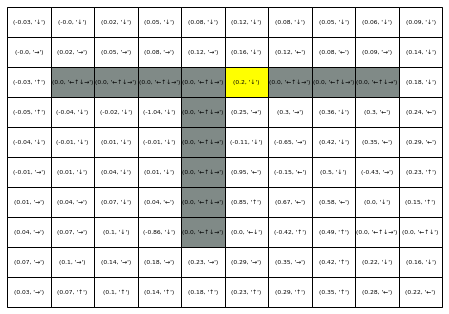

52

In [6]:
print("The above UI can update dynamicly, after 1000 steps:")
###### to show the result, the picture below is produced by a non-interactive plt ############

In [ ]:
#################### Question 4(a) Exercise 1-1 ####################
def gaussian_likelihood(x, mu, log_std):
    """
    Args:
        x: Tensor with shape [batch, dim]
        mu: Tensor with shape [batch, dim]
        log_std: Tensor with shape [batch, dim] or [dim]

    Returns:
        Tensor with shape [batch]
    """
    exptensor=torch.exp(log_std)
    diff=((x-mu)/exptensor)**2
    res = -0.5 * (diff + 2*log_std + np.log(2*np.pi)).sum(axis=-1)
    return res

In [ ]:
#################### Pytorch ####################
#################### Question 4(a) Exercise 1-2 ####################
def mlp(sizes, activation, output_activation=nn.Identity):
    """
    Build a multi-layer perceptron in PyTorch.

    Args:
        sizes: Tuple, list, or other iterable giving the number of units
            for each layer of the MLP. 

        activation: Activation function for all layers except last.

        output_activation: Activation function for last layer.

    Returns:
        A PyTorch module that can be called to give the output of the MLP.
        (Use an nn.Sequential module.)

    """
    # output=f(a) where f is activation function
    layer=[]
    n=len(sizes)-1
    for i in range(n):
        if i < n-1:
            a=activation
        else:
            a=output_activation
        layer+=[nn.Linear(sizes[i], sizes[i+1]), a()]
    return nn.Sequential(*layer)
    # pass
def gaussian_likelihood(x, mu, log_std):
    exptensor=torch.exp(log_std)
    diff=((x-mu)/exptensor)**2
    res = -0.5 * (diff + 2*log_std + np.log(2*np.pi)).sum(axis=-1)
    return res
class MLPGaussianActor(nn.Module):
    def __init__(self, obs_dim, act_dim, hidden_sizes, activation):
        super().__init__()
        """
        Initialize an MLP Gaussian Actor by making a PyTorch module for computing the
        mean of the distribution given a batch of observations, and a log_std parameter.

        Make log_std a PyTorch Parameter with the same shape as the action vector, 
        independent of observations, initialized to [-0.5, -0.5, ..., -0.5].
        (Make sure it's trainable!)
        """
        tmp=np.ones(act_dim, dtype=np.float32)
        self.log_std = torch.nn.Parameter(torch.as_tensor(-0.5*tmp))
        self.mu_net = mlp(list(hidden_sizes)+[obs_dim]+[act_dim], activation)

In [ ]:
#################### Question 4(a) Exercise 1-3 ####################
def compute_loss_q(data):
        o, a, r, o2, d = data['obs'], data['act'], data['rew'], data['obs2'], data['done']

        # Q-values
        q1 = ac.q1(o,a)
        q2 = ac.q2(o,a)

        with torch.no_grad():
            outpi=ac_targ.pi(o2)

        # Target policy smoothing
            # target_noise=0.2: Stddev for smoothing noise added to target policy.
            tmp=target_noise*torch.randn_like(outpi)
            # noise_clip =0.5: Limit for abs value of target policy smoothing noise.
            eps=torch.clamp(tmp, -noise_clip, noise_clip)
            tmp=outpi+eps
            a2=torch.clamp(tmp, -act_limit, act_limit)

        # Target Q-values
            q1_out=ac_targ.q1(o2, a2)
            q2_out=ac_targ.q2(o2, a2)
            q_out=torch.min(q1_out, q2_out)
            qpi=r+(1-d)*gamma*q_out

        # MSE loss against Bellman backup
        loss_q1 = pow((q1 - qpi),2).mean()
        loss_q2 = pow((q2 - qpi),2).mean()
        loss_q = loss_q1 + loss_q2

        # Useful info for logging
        loss_info = dict(Q1Vals=q1.detach().numpy(),
                         Q2Vals=q2.detach().numpy())

        return loss_q, loss_info

    # Set up function for computing TD3 pi loss
def compute_loss_pi(data):
        o = data['obs']
        loss_pi = (-ac.q1(o,ac.pi(o))).mean()
        return loss_pi

In [ ]:
#################### Question 4(b) Exercise 2-2 ####################
class BuggedMLPQFunction(nn.Module):
        def __init__(self, obs_dim, act_dim, hidden_sizes, activation):
            super().__init__()
            self.q = mlp([obs_dim + act_dim] + \
                    list(hidden_sizes) + [1], activation)
        def forward(self, obs, act):
#             return self.q(torch.cat([obs, act], dim=-1))
            return torch.squeeze(q, -1)